그래프 생성 !

In [1]:
# 기존 방법으로 생성하기
# 에르되시 - 레니 모델 : G(n,p) = 노드 n개가 있고, 두 노드가 연결될 확률이 p. nC2의 경우의 수

import networkx as nx
import matplotlib.pyplot as plt

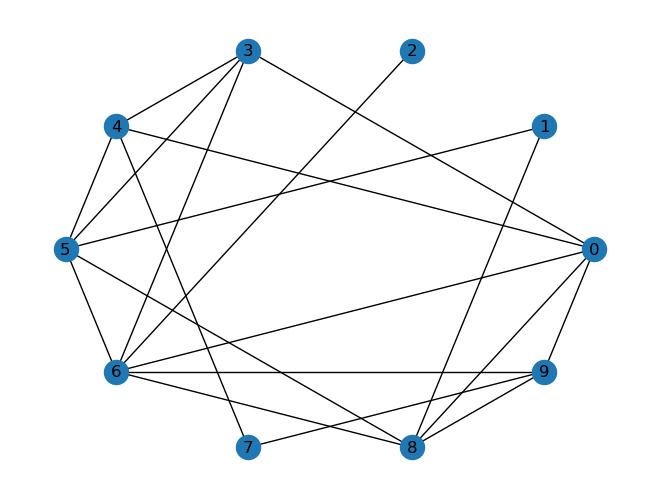

In [ ]:
G = nx.erdos_renyi_graph(10,0.5,seed=0) # 10개의 노드가 0.5 확률로 연결
pos = nx.circular_layout(G) # 모든 노드를 원(circle) 둘레에 동일 간격으로 배치한 2D 좌표를 반환하는 함수
nx.draw(G,pos=pos,with_labels=True)

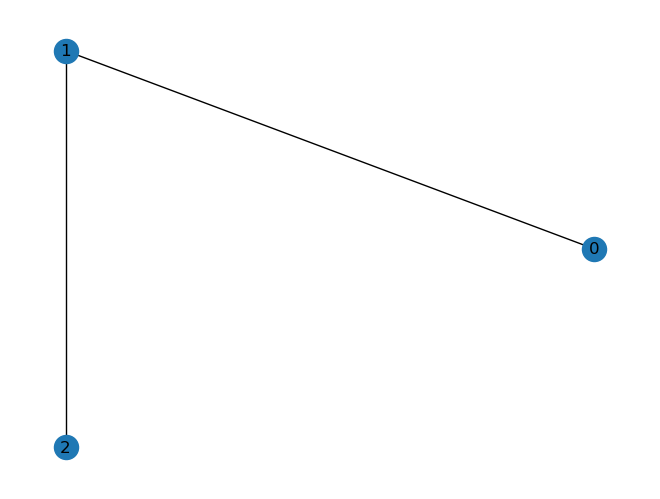

In [3]:
# gnm 모델 : G(n,M) : 노드가 n개이고, 간선이 M개
G = nx.gnm_random_graph(3,2,seed=0)
pos = nx.circular_layout(G)
nx.draw(G,pos=pos,with_labels=True)

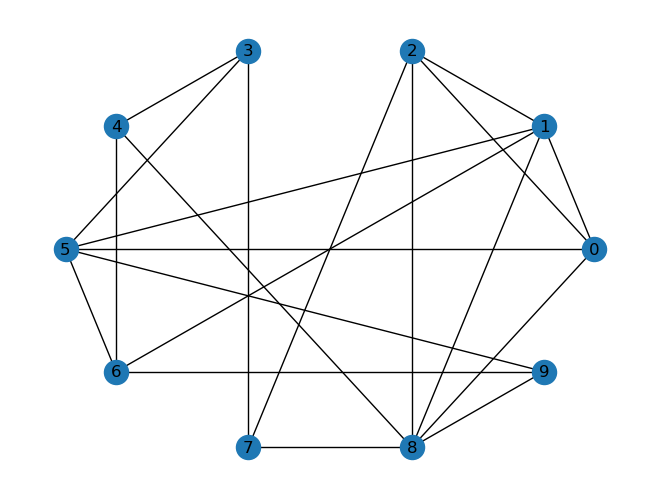

In [4]:
# 스몰 월드 모델 : 짧은 경로에 클러스터링 계수가 높은 모델 (우리사회의 관계망과 비슷함)
# 와츠-스트로가츠 : 스몰 월드 모델의 특징을 인공신경망으로 나타낸 모델

G = nx.watts_strogatz_graph(10,4,0.5,seed=0)
pos = nx.circular_layout(G) # 모든 노드를 원(circle) 둘레에 동일 간격으로 배치한 2D 좌표를 반환하는 함수
nx.draw(G,pos=pos,with_labels=True)

In [1]:
import numpy as np
import tensorflow as tf

import pandas as pd
from tensorflow import one_hot
import deepchem as dc
from deepchem.models.optimizers import ExponentialDecay
from deepchem.models import BasicMolGANModel as MolGAN
from deepchem.feat.molecule_featurizers import GraphMatrix

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolfiles
from rdkit.Chem import rdmolops
from rdkit.Chem.Draw import IPythonConsole

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
_, datasets, _ = dc.molnet.load_tox21()
# df = pd.DataFrame(datasets[0].ids,columns=['smiles'])

In [3]:
df = pd.DataFrame(datasets[0].ids,columns=['smiles'])
df

,smiles
0,CC(O)(P(=O)(O)O)P(=O)(O)O
1,CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
2,OC[C@H](O)[C@@H](O)[C@H](O)CO
3,CCCCCCCC(=O)[O-].CCCCCCCC(=O)[O-].[Zn+2]
4,CC(C)COC(=O)C(C)C
...,...
6253,Cc1cc(CCCOc2c(C)cc(-c3noc(C(F)(F)F)n3)cc2C)on1
6254,O=C1OC(OC(=O)c2cccnc2Nc2cccc(C(F)(F)F)c2)c2ccc...
6255,CC(=O)C1(C)CC2=C(CCCC2(C)C)CC1C
6256,CC(C)CCC[C@@H](C)[C@H]1CC(=O)C2=C3CC[C@H]4C[C@...


In [4]:
max_atom = 15
molecules = [x for x in df['smiles'].values if Chem.MolFromSmiles(x).GetNumAtoms() < max_atom]
#분자 갯수가 15개 이하인 것만 추출
#MolFromSmiles = 정확하게 화학적 정보를 기반으로 판단
featurizer = dc.feat.MolGanFeaturizer(max_atom_count=max_atom)

[14:52:37] WARNING: not removing hydrogen atom without neighbors


In [5]:
features = []
for x in molecules:
    mol = Chem.MolFromSmiles(x)
    new_order = rdmolfiles.CanonicalRankAtoms(mol)
    mol = rdmolops.RenumberAtoms(mol,new_order)
    feature = featurizer.featurize(mol)
    if feature.size!=0:
        features.append(feature[0])

Failed to featurize datapoint 0, CC(O)(P(=O)(O)O)P(=O)(O)O. Appending empty array
Exception message: 15
Failed to featurize datapoint 0, CCCCNC(=S)NCCCC. Appending empty array
Exception message: 16
Failed to featurize datapoint 0, O=[N+]([O-])[O-].O=[N+]([O-])[O-].[Ca+2]. Appending empty array
Exception message: 20
Failed to featurize datapoint 0, CC(C)CCCCCOC(=O)CCS. Appending empty array
Exception message: 16
[14:52:37] WARNING: not removing hydrogen atom without neighbors
Failed to featurize datapoint 0, F[B-](F)(F)F.[H+]. Appending empty array
Exception message: 5
Failed to featurize datapoint 0, [I-].[K+]. Appending empty array
Exception message: 19
Failed to featurize datapoint 0, C[Si](C)(C)N[Si](C)(C)C. Appending empty array
Exception message: 14
Failed to featurize datapoint 0, C=CC(=O)OCCCl. Appending empty array
Exception message: 17
Failed to featurize datapoint 0, CCC[Si](OC)(OC)OC. Appending empty array
Exception message: 14
Failed to featurize datapoint 0, ClCOCCl. Appen

In [6]:
features = [x for x in features if type(x) is GraphMatrix]

In [7]:
gan = MolGAN(learning_rage=ExponentialDecay(0.001,0.9,5000),vertices=max_atom)

2025-11-30 14:52:39.483339: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-30 14:52:39.483524: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-30 14:52:39.483530: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-11-30 14:52:39.483741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-30 14:52:39.484026: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
dataset = dc.data.NumpyDataset(X=[x.adjacency_matrix for x in features], y=[x.node_features for x in features])

In [9]:
def iterbatches(epochs): # 데이터 배치를 만들어서 gan에 전달
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges) # 인접 정보 
            node_tensor = one_hot(batch[1], gan.nodes) # 노드 정보
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]: node_tensor}
            #GAN이라서 제너레이터 형식으로 써야함,,,,,,

In [10]:
gan.fit_gan(iterbatches(25),generator_steps=0.2) # 생성자를 판별자보다 5배 더 느리게 업데이트

2025-11-30 14:52:40.747584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Ending global_step 549: generator average loss -4.60273, discriminator average loss -21.429
TIMING: model fitting took 51.630 s


In [11]:
# 1000개 분자 구조 생성
generated_data = gan.predict_gan_generator(1000)
generated_mols = featurizer.defeaturize(generated_data)

Generating 1000 samples


[14:53:32] Explicit valence for atom # 0 O, 29, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 29, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 25, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 29, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 28, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 28, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 30, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 29, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 29, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 29, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 31, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 27, is greater than permitted
[14:53:32] Explicit valence for atom # 0 O, 27, is greater than permitted
[14:53:32] Explicit valence for atom #

In [ ]:
# 분자 구조가 유효한지
valid_mols = [x for x in generated_mols if x is not None]
print (f'{len(valid_mols)} valid molecules (out of {len((generated_mols))} generated molecules)')

25 valid molecules (out of 1000 generated molecules)


In [13]:
# 겹치는게 없는지
generated_smiles = [Chem.MolToSmiles(x) for x in valid_mols]
generated_smiles_viz = [Chem.MolFromSmiles(x) for x in set(generated_smiles)]
print(f'{len(generated_smiles_viz)} unique valid molecules ({len(generated_smiles)-len(generated_smiles_viz)} redundant molecules)')

5 unique valid molecules (20 redundant molecules)


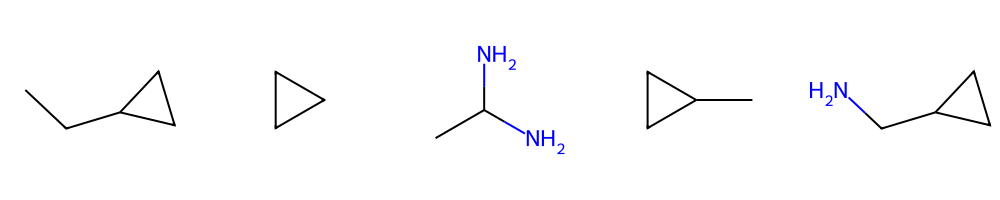

In [14]:
Draw.MolsToGridImage(generated_smiles_viz, molsPerRow=5, subImgSize=(200, 200), returnPNG=False)